## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  17.016612   376.139386  0.622776  8.190903  1.639428
1  23.876802  1196.000489  0.794313  9.202135  1.392406
2  41.120892   935.379699  0.148340  9.832991  1.191019
3  16.601491  1528.007470  0.768815  2.517975  1.520502
4  23.270489  1180.955474  0.475451  3.506553  1.656990


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9587128	total: 57ms	remaining: 56.9s
1:	learn: 0.9497759	total: 57.5ms	remaining: 28.7s
2:	learn: 0.9384880	total: 58.1ms	remaining: 19.3s
3:	learn: 0.9255064	total: 58.5ms	remaining: 14.6s
4:	learn: 0.9152975	total: 59.1ms	remaining: 11.8s
5:	learn: 0.9064881	total: 59.5ms	remaining: 9.86s
6:	learn: 0.8967637	total: 59.9ms	remaining: 8.5s
7:	learn: 0.8846265	total: 60.5ms	remaining: 7.5s
8:	learn: 0.8756110	total: 61ms	remaining: 6.72s
9:	learn: 0.8657219	total: 61.6ms	remaining: 6.09s
10:	learn: 0.8547749	total: 62ms	remaining: 5.58s
11:	learn: 0.8460307	total: 62.4ms	remaining: 5.14s
12:	learn: 0.8382961	total: 63.5ms	remaining: 4.82s
13:	learn: 0.8302886	total: 63.9ms	remaining: 4.5s
14:	learn: 0.8206944	total: 64.5ms	remaining: 4.24s
15:	learn: 0.8119465	total: 65.1ms	remaining: 4s
16:	learn: 0.8030111	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7969037	total: 66ms	remaining: 3.6s
18:	learn: 0.7884186	total: 66.6ms	remaining: 3.44s
19:	lea

110:	learn: 0.3522611	total: 106ms	remaining: 848ms
111:	learn: 0.3492958	total: 107ms	remaining: 846ms
112:	learn: 0.3471269	total: 107ms	remaining: 841ms
113:	learn: 0.3451866	total: 107ms	remaining: 835ms
114:	learn: 0.3426128	total: 108ms	remaining: 830ms
115:	learn: 0.3397116	total: 108ms	remaining: 825ms
116:	learn: 0.3374734	total: 109ms	remaining: 821ms
117:	learn: 0.3350703	total: 109ms	remaining: 815ms
118:	learn: 0.3329776	total: 110ms	remaining: 811ms
119:	learn: 0.3307769	total: 110ms	remaining: 805ms
120:	learn: 0.3288329	total: 110ms	remaining: 800ms
121:	learn: 0.3264775	total: 111ms	remaining: 796ms
122:	learn: 0.3241314	total: 111ms	remaining: 791ms
123:	learn: 0.3222407	total: 112ms	remaining: 788ms
124:	learn: 0.3208828	total: 112ms	remaining: 784ms
125:	learn: 0.3188622	total: 113ms	remaining: 781ms
126:	learn: 0.3162340	total: 113ms	remaining: 777ms
127:	learn: 0.3138385	total: 113ms	remaining: 772ms
128:	learn: 0.3117181	total: 114ms	remaining: 769ms
129:	learn: 

255:	learn: 0.1638679	total: 168ms	remaining: 487ms
256:	learn: 0.1633463	total: 168ms	remaining: 486ms
257:	learn: 0.1627182	total: 168ms	remaining: 484ms
258:	learn: 0.1620460	total: 169ms	remaining: 483ms
259:	learn: 0.1612744	total: 169ms	remaining: 481ms
260:	learn: 0.1608756	total: 169ms	remaining: 479ms
261:	learn: 0.1604175	total: 170ms	remaining: 478ms
262:	learn: 0.1596842	total: 170ms	remaining: 476ms
263:	learn: 0.1592825	total: 170ms	remaining: 475ms
264:	learn: 0.1585870	total: 171ms	remaining: 473ms
265:	learn: 0.1581662	total: 171ms	remaining: 472ms
266:	learn: 0.1577104	total: 172ms	remaining: 471ms
267:	learn: 0.1572321	total: 172ms	remaining: 470ms
268:	learn: 0.1565654	total: 172ms	remaining: 469ms
269:	learn: 0.1556358	total: 173ms	remaining: 468ms
270:	learn: 0.1550732	total: 173ms	remaining: 466ms
271:	learn: 0.1546824	total: 174ms	remaining: 465ms
272:	learn: 0.1541430	total: 174ms	remaining: 463ms
273:	learn: 0.1535649	total: 175ms	remaining: 462ms
274:	learn: 

483:	learn: 0.0846171	total: 269ms	remaining: 287ms
484:	learn: 0.0844088	total: 270ms	remaining: 287ms
485:	learn: 0.0841956	total: 270ms	remaining: 286ms
486:	learn: 0.0840362	total: 271ms	remaining: 285ms
487:	learn: 0.0839053	total: 271ms	remaining: 285ms
488:	learn: 0.0834483	total: 272ms	remaining: 284ms
489:	learn: 0.0830000	total: 272ms	remaining: 283ms
490:	learn: 0.0828889	total: 273ms	remaining: 283ms
491:	learn: 0.0827425	total: 273ms	remaining: 282ms
492:	learn: 0.0826433	total: 274ms	remaining: 281ms
493:	learn: 0.0821251	total: 274ms	remaining: 281ms
494:	learn: 0.0816775	total: 274ms	remaining: 280ms
495:	learn: 0.0815805	total: 275ms	remaining: 279ms
496:	learn: 0.0814154	total: 275ms	remaining: 279ms
497:	learn: 0.0813195	total: 276ms	remaining: 278ms
498:	learn: 0.0812247	total: 276ms	remaining: 277ms
499:	learn: 0.0809992	total: 277ms	remaining: 277ms
500:	learn: 0.0805012	total: 277ms	remaining: 276ms
501:	learn: 0.0803091	total: 278ms	remaining: 275ms
502:	learn: 

667:	learn: 0.0504072	total: 348ms	remaining: 173ms
668:	learn: 0.0502400	total: 350ms	remaining: 173ms
669:	learn: 0.0501058	total: 350ms	remaining: 172ms
670:	learn: 0.0500248	total: 350ms	remaining: 172ms
671:	learn: 0.0498116	total: 351ms	remaining: 171ms
672:	learn: 0.0496904	total: 351ms	remaining: 171ms
673:	learn: 0.0494918	total: 352ms	remaining: 170ms
674:	learn: 0.0492747	total: 352ms	remaining: 169ms
675:	learn: 0.0491653	total: 353ms	remaining: 169ms
676:	learn: 0.0489674	total: 353ms	remaining: 168ms
677:	learn: 0.0488905	total: 353ms	remaining: 168ms
678:	learn: 0.0488152	total: 354ms	remaining: 167ms
679:	learn: 0.0486247	total: 354ms	remaining: 167ms
680:	learn: 0.0484484	total: 355ms	remaining: 166ms
681:	learn: 0.0483215	total: 355ms	remaining: 166ms
682:	learn: 0.0482734	total: 355ms	remaining: 165ms
683:	learn: 0.0481187	total: 356ms	remaining: 164ms
684:	learn: 0.0480472	total: 356ms	remaining: 164ms
685:	learn: 0.0480006	total: 357ms	remaining: 163ms
686:	learn: 

907:	learn: 0.0294931	total: 451ms	remaining: 45.7ms
908:	learn: 0.0293942	total: 451ms	remaining: 45.2ms
909:	learn: 0.0293534	total: 452ms	remaining: 44.7ms
910:	learn: 0.0292613	total: 452ms	remaining: 44.2ms
911:	learn: 0.0291795	total: 452ms	remaining: 43.6ms
912:	learn: 0.0291414	total: 453ms	remaining: 43.1ms
913:	learn: 0.0291039	total: 453ms	remaining: 42.6ms
914:	learn: 0.0290082	total: 454ms	remaining: 42.1ms
915:	learn: 0.0289680	total: 454ms	remaining: 41.6ms
916:	learn: 0.0288943	total: 454ms	remaining: 41.1ms
917:	learn: 0.0288670	total: 455ms	remaining: 40.6ms
918:	learn: 0.0288229	total: 455ms	remaining: 40.1ms
919:	learn: 0.0287963	total: 456ms	remaining: 39.6ms
920:	learn: 0.0287594	total: 456ms	remaining: 39.1ms
921:	learn: 0.0286597	total: 456ms	remaining: 38.6ms
922:	learn: 0.0286338	total: 457ms	remaining: 38.1ms
923:	learn: 0.0285383	total: 457ms	remaining: 37.6ms
924:	learn: 0.0284768	total: 458ms	remaining: 37.1ms
925:	learn: 0.0283803	total: 458ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

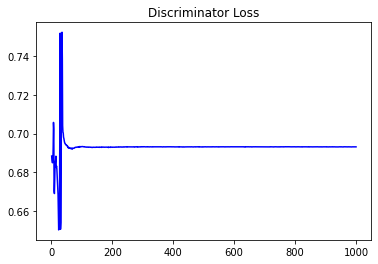

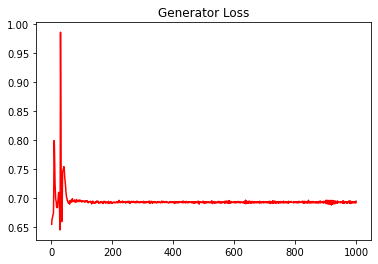

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.27088043493552166


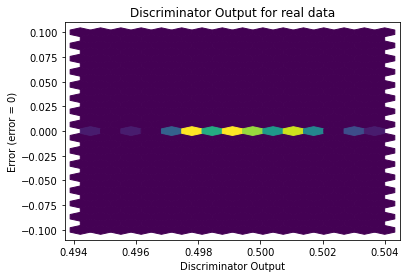

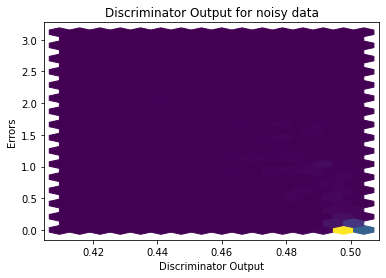

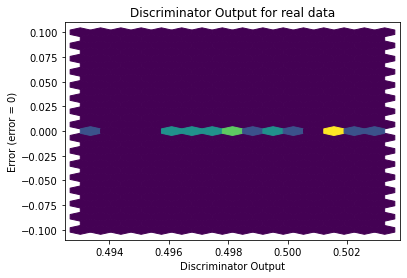

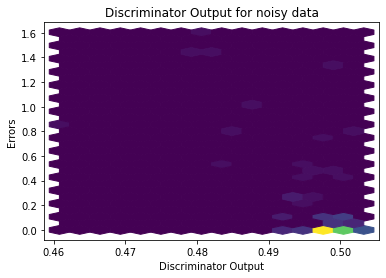

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


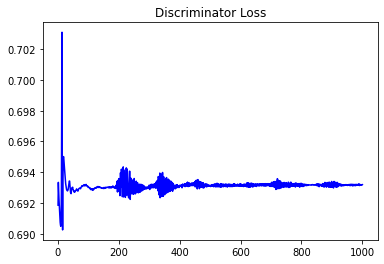

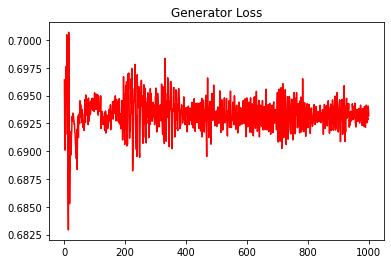

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2353721234397914


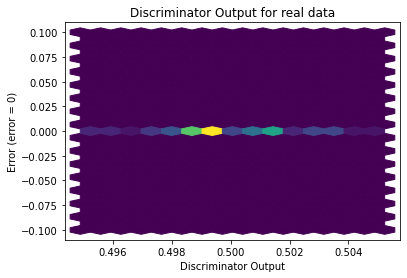

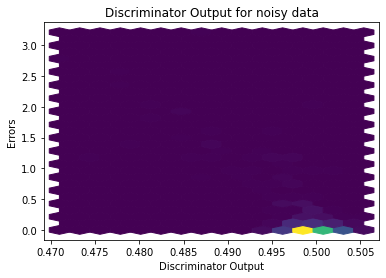

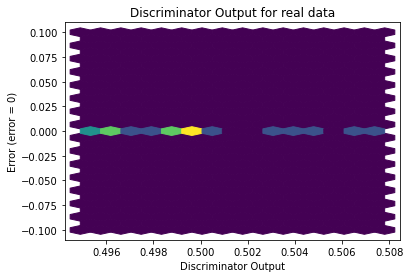

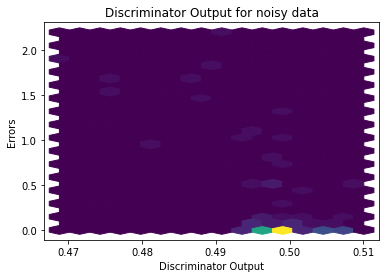

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0648]], requires_grad=True)
